In [1]:
# Load packages
import pandas as pd
import numpy as np

# Load Data Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

# Load Text Cleaning
import neattext.functions as nfx

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data
df=pd.read_csv('emotion_dataset_raw.csv')

In [4]:
# Preview
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
# shape
df.shape

(34792, 2)

In [6]:
# data types
df.dtypes

Emotion    object
Text       object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
Emotion    34792 non-null object
Text       34792 non-null object
dtypes: object(2)
memory usage: 543.8+ KB


In [8]:
# missing values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [9]:
# Elements of the column 'Emotion'
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [10]:
# Elements of the column 'Emotion' with percentage
df.Emotion.value_counts(normalize=True)

joy         0.317458
sadness     0.193205
fear        0.155496
anger       0.123505
surprise    0.116751
neutral     0.064785
disgust     0.024603
shame       0.004196
Name: Emotion, dtype: float64

In [11]:
#df['Emotion'].value_counts().plot(kind='bar')

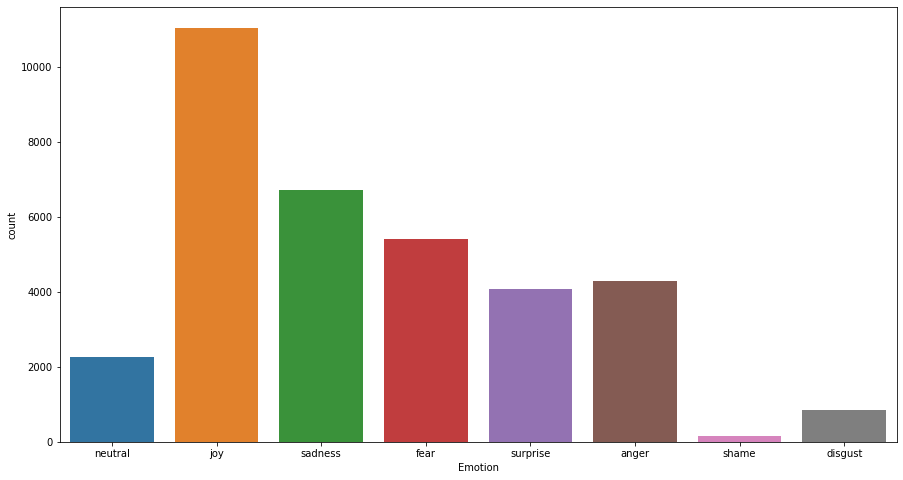

In [12]:
# show elements of 'Emotion'
plt.figure(figsize=(15,8))
sns.countplot(x='Emotion',data=df)
plt.show()

In [13]:
# Elements of the column 'Emotion'
#df.Text.value_counts()

In [14]:
# Sentiment Analysis
from textblob import TextBlob

In [15]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result='Positive'
    elif sentiment < 0:
        result='Negative'
    else:
        result='Neutral'
    return result

In [16]:
#Test get_sentiment
get_sentiment('I love programming')

'Positive'

In [17]:
df['Sentiment']=df['Text'].apply(get_sentiment)

In [18]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [19]:
# Emotion Vs Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

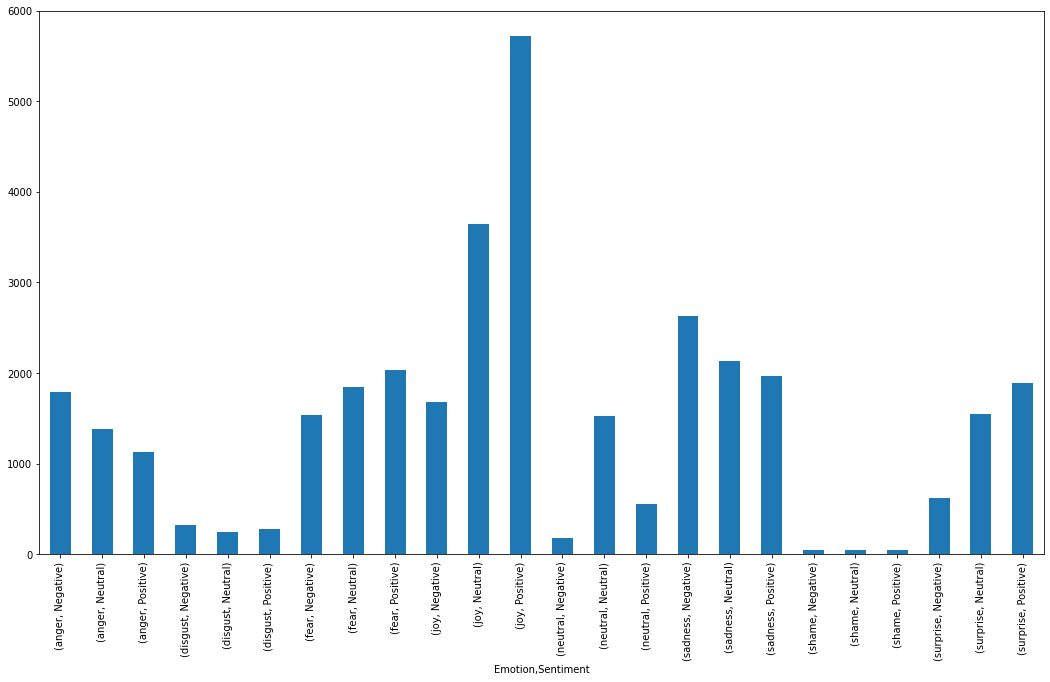

In [20]:
# 1.Show Emotion Vs Sentiment
plt.figure(figsize=(18,10))
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')
plt.show()

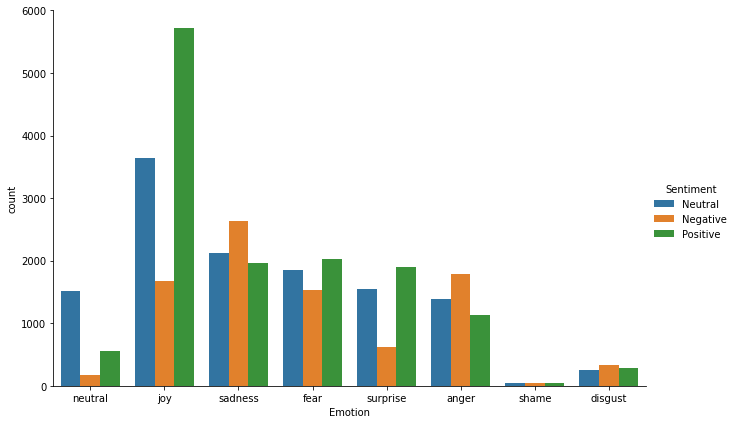

In [21]:
# Show Emotion Vs Sentiment
sns.catplot(x='Emotion', hue='Sentiment', kind='count', data=df, height=6, aspect=1.5)

### Text Cleaning:
+ Remove noise
  - stopwords
  - special characters
  - punctuations
  - emojis

In [22]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [23]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [24]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [25]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [26]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [27]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


### Keyword Extraction
+ Extract most commonest words per class of emotion

In [28]:
from collections import Counter

In [29]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split() ]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [30]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [31]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [32]:
joy_list=df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [33]:
#joy_list

In [34]:
# 'joy' document
joy_docx=' '.join(joy_list)

In [35]:
#joy_docx

In [36]:
# Extract Keywords
keyword_joy=extract_keywords(joy_docx)

In [37]:
#keyword_joy

In [38]:
#keyword_joy.items()

In [39]:
# Show keyword_joy
def show_most_comman_words(mdict,emotion_name):
    df1=pd.DataFrame(mdict.items(),columns=['token','count'])
    plt.figure(figsize=(18,10))
    plt.title('Plot of {} Most Comman Keywords'.format(emotion_name))
    sns.barplot(x='token',y='count',data=df1)
    plt.xticks(rotation=45)
    plt.show()

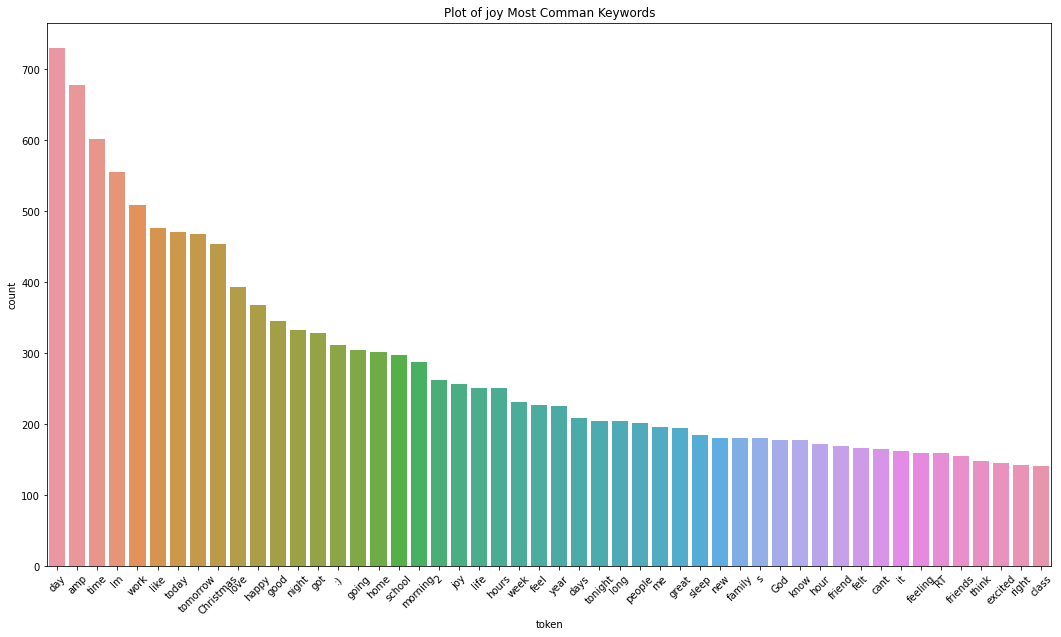

In [40]:
show_most_comman_words(keyword_joy,"joy")

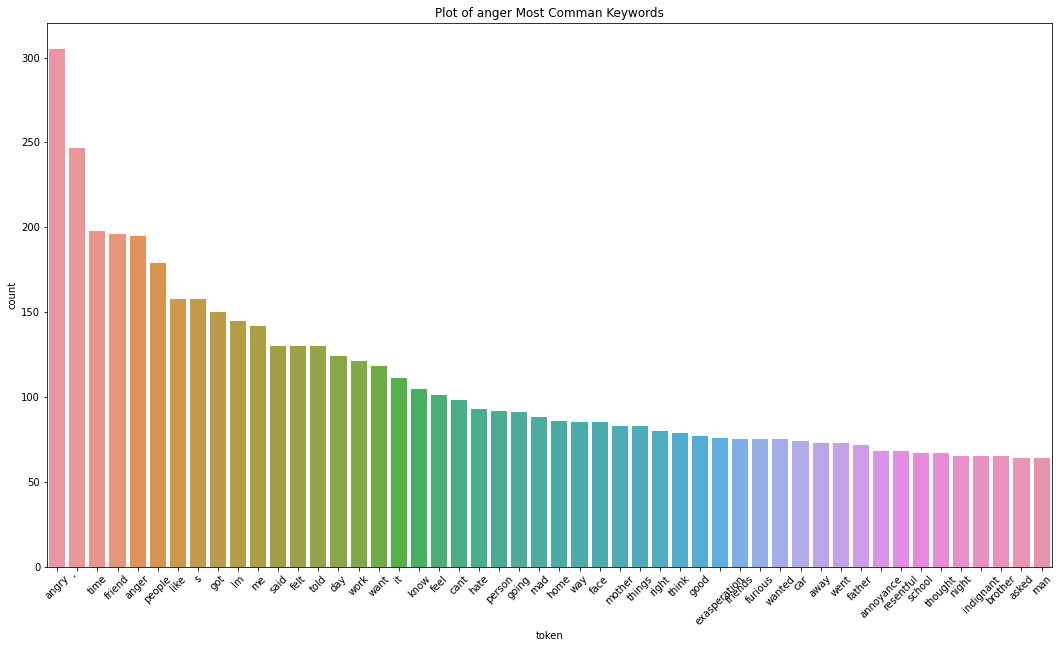

In [41]:
anger_list=df[df['Emotion'] == 'anger']['Clean_Text'].tolist()

# 'anger' document
anger_docx=' '.join(anger_list)

# Extract Keywords
keyword_anger=extract_keywords(anger_docx)

# Show keyword_anger
show_most_comman_words(keyword_anger,'anger')

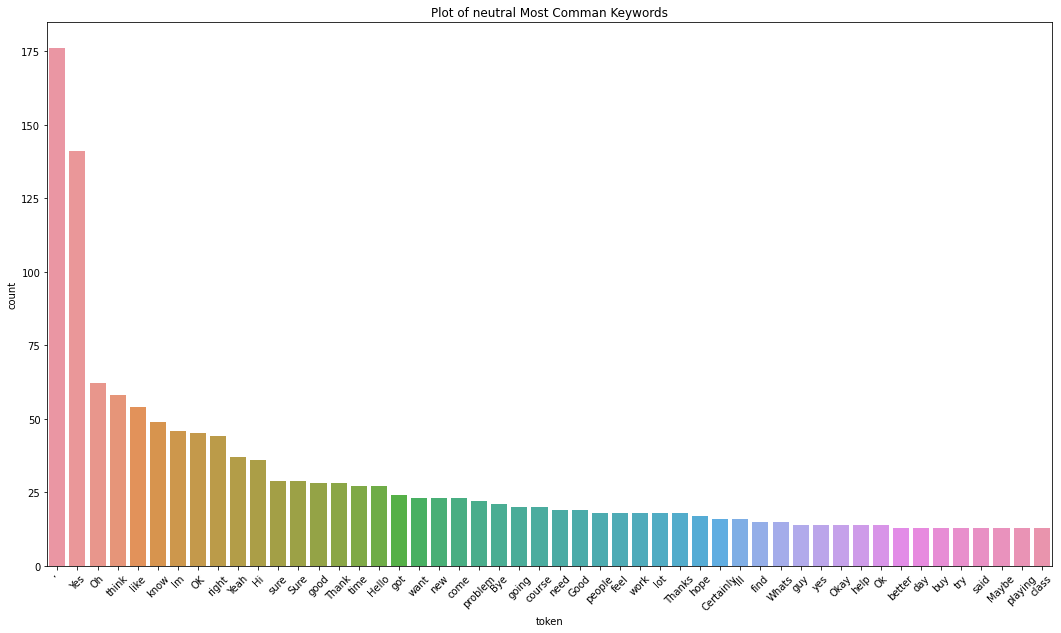

In [42]:
neutral_list=df[df['Emotion'] == 'neutral']['Clean_Text'].tolist()

# 'neutral' document
neutral_docx=' '.join(neutral_list)

# Extract Keywords
keyword_neutral=extract_keywords(neutral_docx)

# Show keyword_neutral
show_most_comman_words(keyword_neutral,"neutral")

In [43]:
# WordCloud
from wordcloud import WordCloud

In [44]:
def plot_wordcloud(doc):
    mwordlcloud=WordCloud().generate(doc)
    plt.figure(figsize=(18,10))
    plt.imshow(mwordlcloud,interpolation='bilinear')
    plt.axis('OFF')
    plt.show()

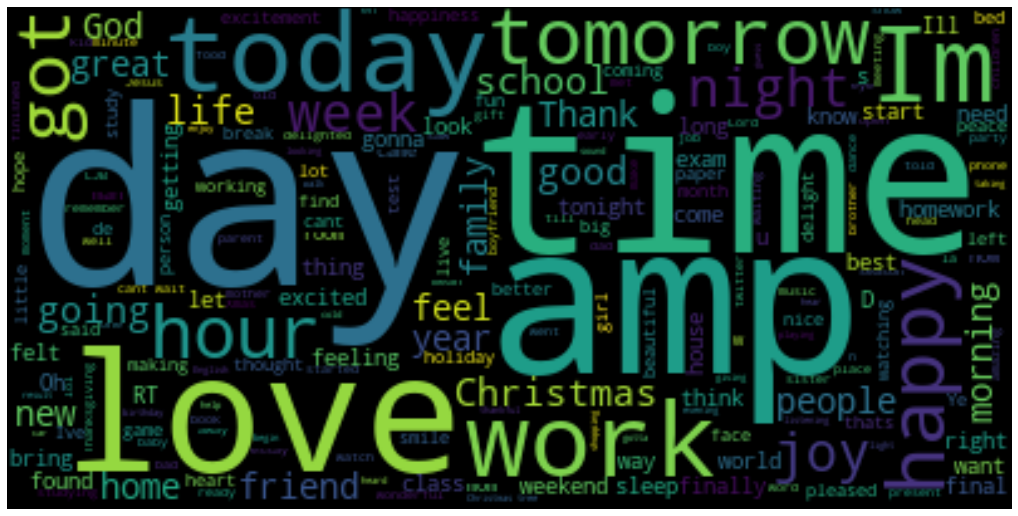

In [45]:
plot_wordcloud(joy_docx)

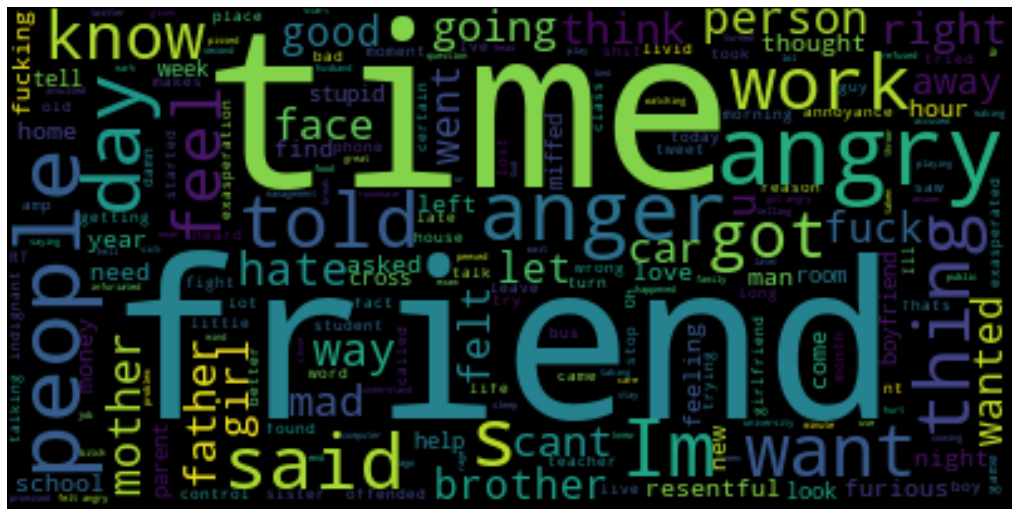

In [46]:
plot_wordcloud(anger_docx)

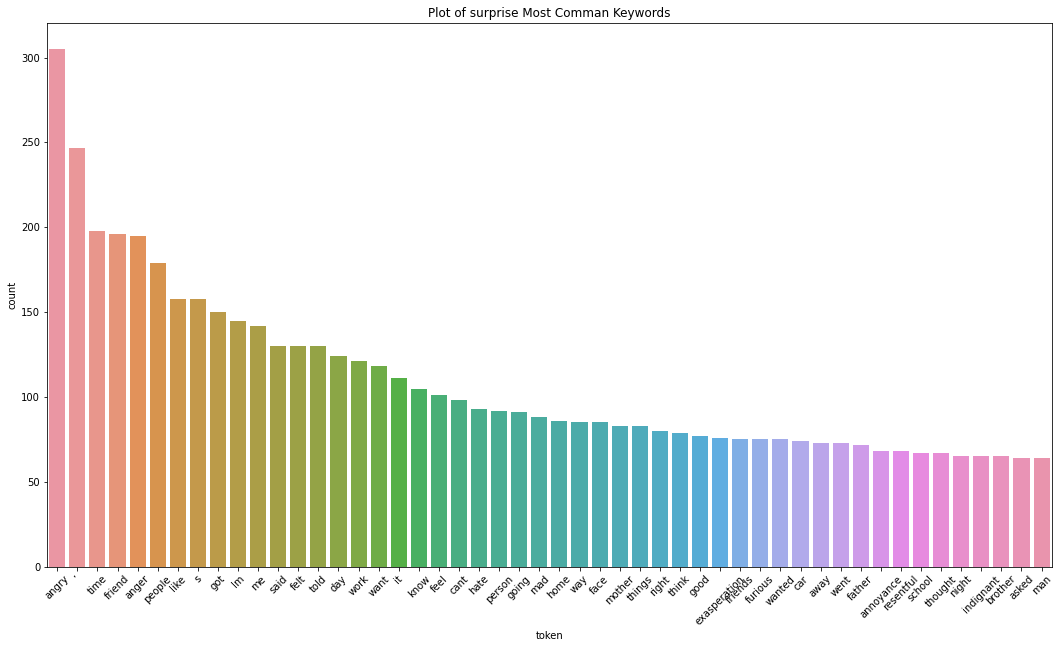

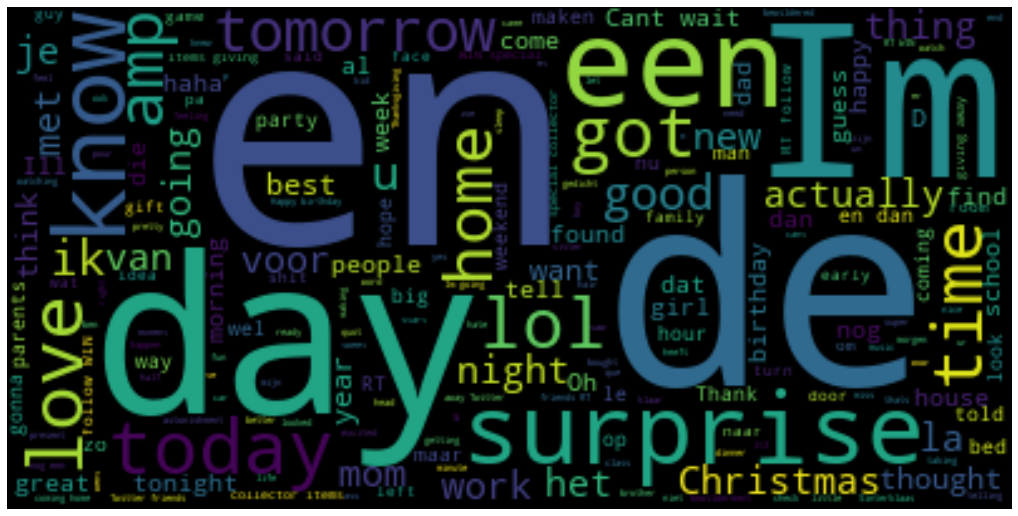

In [47]:
surprise_list=df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()

# 'surprise' document
surprise_docx=' '.join(surprise_list)

# Extract Keywords
keyword_surprise=extract_keywords(surprise_docx)

# Show keyword_surprise
show_most_comman_words(keyword_anger,'surprise')

# WordCloud
plot_wordcloud(surprise_docx)

### Machine Learning

+ Naive Bayes
+ LogisticRegression
+ KNN
+ DecisionTree


### Compare with SparkNLP/ NLU Jhon snows Lab


In [48]:
# Load Machine Learning packages
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### X-y Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_features=df['Clean_Text']

In [51]:
ylabels=df['Emotion']

In [52]:
X_features

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [53]:
# Vectorizer
cv = CountVectorizer()
X=cv.fit_transform(X_features)

In [54]:
# Get features by Name
#cv.get_feature_names()

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

### Build Model

In [56]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [57]:
#Predict Emotion
def predict_emotion(sample_text,model):
    mvect=cv.transform(sample_text).toarray()
    prediction=model.predict(mvect)
    pred_proba=model.predict_proba(mvect)
    pred_percentage=dict(zip(model.classes_,pred_proba[0]))
    print('Prediction:{}, Prediction Score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage

In [58]:
predict_emotion(['he is happy'],nb_model)

Prediction:joy, Prediction Score:0.8391706295182494


{'anger': 0.0031133245748582025,
 'disgust': 0.0005861853384997564,
 'fear': 0.004709990966057114,
 'joy': 0.8391706295182494,
 'neutral': 0.0002233793199268388,
 'sadness': 0.04016549884546162,
 'shame': 6.492921689729617e-06,
 'surprise': 0.11202449851525767}

y_test_pred_nb:

['fear' 'sadness' 'sadness' ... 'sadness' 'anger' 'sadness']

Confusion Matrix:

[[ 633    0   58  373    7  199    0   13]
 [  31   10   25  132    2   81    0   11]
 [  79    2  984  353    4  160    0   63]
 [  76    1  100 2848    9  204    0   73]
 [  20    0   17  550   14   71    0    3]
 [  89    1   74  726    7 1080    0   38]
 [   9    0    7   13    0    5    1    1]
 [  49    5   47  621    4  135    0  320]]

Accuracy Score:

0.5642843456600881

Classification Report:

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    acc

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

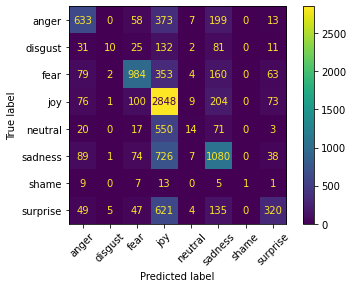

In [59]:
# Classification
# Model performance
y_test_pred_nb = nb_model.predict(X_test)
print('y_test_pred_nb:\n')
print(y_test_pred_nb)
print()
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, y_test_pred_nb))
print()
print('Accuracy Score:\n')
print(accuracy_score(y_test, y_test_pred_nb))
print()
print('Classification Report:\n')
print(classification_report(y_test, y_test_pred_nb))
print()
print('Plot Confusion Matrix:\n')
plot_confusion_matrix(nb_model,X_test,y_test)
plt.xticks(rotation=45)


### Save Model

In [60]:
import joblib

In [61]:
model_file=open('emotion_detction_nb_model.pkl','wb')
joblib.dump(nb_model,model_file)
model_file.close()

### Model interpration

In [62]:
# LogesticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [63]:
# Accuracy
lr_model.score(X_test,y_test)

0.622341444721211

In [64]:
# Prediction Emotion
predict_emotion(['he is happy'],lr_model)

Prediction:joy, Prediction Score:0.6269700410906319


{'anger': 0.012970137539882293,
 'disgust': 0.014232540238022512,
 'fear': 0.014788445824287105,
 'joy': 0.6269700410906319,
 'neutral': 0.029270662698382913,
 'sadness': 0.13559214511614773,
 'shame': 0.0011057921781662513,
 'surprise': 0.16507023531447937}

In [65]:
# Interpret Model
import eli5

In [66]:
# Show weights for each Class/Label
eli5.show_weights(lr_model,top=10)

In [67]:
class_names=ylabels.unique().tolist()

In [68]:
feature_names=cv.get_feature_names()

In [69]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)